# Modeling the training data

In [1331]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [1332]:
current_year = 2023
na_values=['', '#N/A', '#N/A N/A', '#NA', '-1.#IND',
           '-1.#QNAN', '-NaN', '-nan', '1.#IND',
           '1.#QNAN', 'N/A', 'NULL', 'NaN',
           'n/a', 'nan', 'null']
house_detail = pd.read_csv('data/train.csv',
                           na_values=na_values,
                           keep_default_na=False)
print(house_detail.shape)
house_detail.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


# Data Cleaning

In [1333]:
# Check for empty values in the columns
def emptyCols(df):
    l = []
    for col in df.columns:
        empty_percent = round((df[col].isna().sum() / len(df[col])) * 100, 2)
        l.append(empty_percent)
    return pd.DataFrame({"columns": df.columns, "empty_percent":l})

emptyCols(house_detail).sort_values(ascending=False,by='empty_percent')

# There are no empty values


,columns,empty_percent
0,Id,0.0000
41,CentralAir,0.0000
59,GarageYrBlt,0.0000
58,GarageType,0.0000
57,FireplaceQu,0.0000
56,Fireplaces,0.0000
55,Functional,0.0000
54,TotRmsAbvGrd,0.0000
53,KitchenQual,0.0000
52,KitchenAbvGr,0.0000


### Data Description
       'MSSubClass',  # Identifies the type of dwelling involved in the sale - categorical
       'MSZoning',    # Identifies the general zoning classification of the sale - categorical
       'LotFrontage', # Linear feet of street connected to property - numerical
       'LotArea',     # Lot size in square feet - numerical
       'Street',      # Type of road access to property - categorical
       'Alley',       # Type of alley access to property - categorical
       'LotShape',    # General shape of property - categorical
       'LandContour', # Flatness of the property - categorical
       'Utilities',   # Type of utilities available - categorical
       'LotConfig',   # Lot configuration - categorical
       'LandSlope',   # Slope of property - categorical
       'Neighborhood', # Physical locations within Ames city limits - categorical
       'Condition1',  # Proximity to various conditions - categorical
       'Condition2',  # Proximity to various conditions - categorical
       'BldgType',    # Type of dwelling - categorical
       'HouseStyle',  # Style of dwelling - categorical
       'OverallQual', # Rates the overall material and finish of the house - categorical
       'OverallCond', # Rates the overall condition of the house - categorical
       'YearBuilt',   # Original construction date - Categorical Ordinal
       'YearRemodAdd',# Remodel date (same as construction date if no remodeling or additions) - Categorical Ordinal
       'RoofStyle',  # Type of roof - Categorical
       'RoofMatl',   # RoofMatl - Categorical
       'Exterior1st', # Exterior covering on house - Categorical
       'Exterior2nd', # Exterior covering on house - Categorical
       'MasVnrType',  # Masonry veneer type - Categorical
       'MasVnrArea',  # Masonry veneer area in square feet - Numerical
       'ExterQual',   # Evaluates the quality of the material on the exterior - Categorical
       'ExterCond',   # Evaluates the present condition of the material on the exterior - Categorical
       'Foundation',  # Type of foundation - Categorical
       'BsmtQual',    # Evaluates the height of the basement - Categorical
       'BsmtCond',    # Evaluates the general condition of the basement
       'BsmtExposure', # Refers to walkout or garden level walls - Categorical
       'BsmtFinType1', # Rating of basement finished area - Categorical
       'BsmtFinSF1',   # Type 1 finished square feet - Numerical
       'BsmtFinType2', # Rating of basement finished area - Categorical
       'BsmtFinSF2',   # Type 2 finished square feet - Numerical
       'BsmtUnfSF',    # Unfinished square feet of basement area - Numerical
       'TotalBsmtSF',  # Total square feet of basement area - Numerical
       'Heating',      # Type of heating - Categorical
       'HeatingQC',    # Heating quality and condition - Categorical
       'CentralAir',   # Central air conditioning - Categorical (Bool)
       'Electrical',   # Electrical system - Categorical
       '1stFlrSF',     # First Floor square feet - Numerical
       '2ndFlrSF',     # Second floor square feet - Numerical
       'LowQualFinSF', # Low quality finished square feet (all floors) - Numerical
       'GrLivArea',    # Above grade (ground) living area square feet - Numerical
       'BsmtFullBath', # Basement full bathrooms -  Categorical
       'BsmtHalfBath', # Basement half bathrooms -  Categorical
       'FullBath',     # Full bathrooms above grade - Categorical
       'HalfBath',     # Half baths above grade  - Categorical
       'BedroomAbvGr', # Bedrooms above grade - Categorical
       'KitchenAbvGr', # Kitchens above grade - Categorical
       'KitchenQual',  # Kitchen quality - Categorical
       'TotRmsAbvGrd', # Total rooms above grade - Categorical
       'Functional',   # Home functionality - Categorical
       'Fireplaces',   # Number of fireplaces - Categorical
       'FireplaceQu',  # fireplace Quality - Categorical
       'GarageType',   # Garage location - Categorical
       'GarageYrBlt',  # Year garage was built - Categorical Ordinal
       'GarageFinish', # Interior finish of the garage - Categorical
       'GarageCars',   # Size of garage in car capacity - Categorical
       'GarageArea',   # Size of garage in square feet - Numerical
       'GarageQual',   # Garage quality - Categorical
       'GarageCond',   # Garage Condition - Categorical
       'PavedDrive',   # Paved Driveway - Categorical
       'WoodDeckSF',   # Wood deck area in square feet - Numerical
       'OpenPorchSF',  # Open Porch area in square feet - Numerical
       'EnclosedPorch',# Enclosed porch area in square feet - Numerical
       '3SsnPorch',    # Three season porch area in square feet - Numerical
       'ScreenPorch',  # Screen porch area in square feet - Numerical
       'PoolArea',     # Pool area in square feet - Numerical
       'PoolQC',       # Pool quality - Categorical
       'Fence',        # Fence quality - Categorical
       'MiscFeature',  # Categorical
       'MiscVal',      # $Value of miscellaneous feature - Numerical
       'MoSold',       # Month Sold - Categorical Ordinal
       'YrSold',       # Year Sold - Categorical Ordinal
       'SaleType',     # Type of sale - Categorical
       'SaleCondition',# Condition of sale - Categorical
       'SalePrice'     # target variable



In [1334]:
# convert Boolean columns to 1/0
house_detail['CentralAir'] =  house_detail.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)


In [1335]:
numerical_cols = ['LotFrontage',
                  'LotArea',
                  'MasVnrArea',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  '1stFlrSF',
                  '2ndFlrSF',
                  'LowQualFinSF',
                  'GrLivArea',
                  'BsmtFinSF1',
                  'GarageArea',
                  'WoodDeckSF',
                  'OpenPorchSF',
                  'EnclosedPorch',
                  '3SsnPorch',
                  'ScreenPorch',
                  'PoolArea',
                  'MiscVal',
                  'SalePrice'
                  ]

categorical_cols = ['MSSubClass',
                    'MSZoning',
                    'Street',
                    'Alley',
                    'LotShape',
                    'LandContour',
                    'Utilities',
                    'LotConfig',
                    'LandSlope',
                    'Neighborhood',
                    'Condition1',
                    'Condition2',
                    'BldgType',
                    'HouseStyle',
                    'OverallQual',
                    'OverallCond',
                    'RoofStyle',
                    'RoofMatl',
                    'Exterior1st',
                    'Exterior2nd',
                    'MasVnrType',
                    'ExterQual',
                    'ExterCond',
                    'Foundation',
                    'BsmtQual',
                    'BsmtExposure',
                    'BsmtFinType1',
                    'BsmtFinType2',
                    'BsmtFullBath',
                    'BsmtHalfBath',
                    'Heating',
                    'HeatingQC',
                    'CentralAir',
                    'Electrical',
                    'KitchenQual',
                    'Functional',
                    'FireplaceQu',
                    'FullBath',
                    'HalfBath',
                    'BedroomAbvGr',
                    'KitchenAbvGr',
                    'TotRmsAbvGrd',
                    'Fireplaces',
                    'GarageCars',
                    'GarageType',
                    'GarageFinish',
                    'GarageQual',
                    'GarageCond',
                    'PavedDrive',
                    'PoolQC',
                    'Fence',
                    'MiscFeature',
                    'SaleType',
                    'SaleCondition'
                    ]

categorical_ordinal_cols = [
    'YearBuilt',
    'YearRemodAdd',
    'GarageYrBlt',
    'MoSold',
    'YrSold'
]

print("{} numerical columns".format(len(numerical_cols)))
print("{} categorical columns".format(len(categorical_cols)))
print("{} categorical ordinal columns".format(len(categorical_ordinal_cols)))
print("{} shape".format(house_detail.shape))
house_detail[house_detail['LotFrontage'] == 'NA'].shape[0]

20 numerical columns
54 categorical columns
5 categorical ordinal columns
(1460, 81) shape


259

### Cleaning numerical columns

In [1336]:
def NACols(df):
    l = []
    for col in df.columns:
        empty_percent = round((df[df[col] == 'NA'].shape[0] / len(df[col])) * 100, 2)
        l.append(empty_percent)
    return pd.DataFrame({"columns": df.columns, "na_percent":l})

NACols(house_detail[numerical_cols]).sort_values(ascending=False,by='na_percent')


,columns,na_percent
0,LotFrontage,17.7400
2,MasVnrArea,0.5500
11,GarageArea,0.0000
18,MiscVal,0.0000
17,PoolArea,0.0000
16,ScreenPorch,0.0000
15,3SsnPorch,0.0000
14,EnclosedPorch,0.0000
13,OpenPorchSF,0.0000
12,WoodDeckSF,0.0000


In [1337]:
# LotFrontage is 17.7% of the data; update NA to 0 indicating no Frontage
house_detail['LotFrontage'] = house_detail['LotFrontage'].apply(lambda x: 0 if x == 'NA' else x)

# MasVnrArea is only 0.5% of the data; removing the rows
house_detail = house_detail[~(house_detail['MasVnrArea'] == 'NA')]

house_detail['LotFrontage'] = house_detail['LotFrontage'].astype('int64')
house_detail['MasVnrArea'] = house_detail['MasVnrArea'].astype('int64')

NACols(house_detail[numerical_cols]).sort_values(ascending=False,by='na_percent')



,columns,na_percent
0,LotFrontage,0.0000
1,LotArea,0.0000
18,MiscVal,0.0000
17,PoolArea,0.0000
16,ScreenPorch,0.0000
15,3SsnPorch,0.0000
14,EnclosedPorch,0.0000
13,OpenPorchSF,0.0000
12,WoodDeckSF,0.0000
11,GarageArea,0.0000


### Cleaning Categorical columns

In [1338]:
house_detail[categorical_ordinal_cols].info()
NACols(house_detail[categorical_ordinal_cols]).sort_values(ascending=False,by='na_percent')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YearBuilt     1452 non-null   int64 
 1   YearRemodAdd  1452 non-null   int64 
 2   GarageYrBlt   1452 non-null   object
 3   MoSold        1452 non-null   int64 
 4   YrSold        1452 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 68.1+ KB


,columns,na_percent
2,GarageYrBlt,5.5800
0,YearBuilt,0.0000
1,YearRemodAdd,0.0000
3,MoSold,0.0000
4,YrSold,0.0000


In [1339]:
house_detail[house_detail['GarageType'] == 'NA']['GarageYrBlt'].value_counts()
## GarageYrBlt is NA only for GarageType == NA
## Better to calculate number of years and drop all date columns

house_detail['RemodAdd_Yrs'] = house_detail.apply(lambda x: current_year - int(x['YearRemodAdd']) if x['YearRemodAdd'] != 'NA' else 0,axis=1)
house_detail['GarageBlt_Yrs'] = house_detail.apply(lambda x: current_year - int(x['GarageYrBlt']) if x['GarageYrBlt'] != 'NA' else 0,axis=1)
house_detail['Sold_Yrs'] = house_detail.apply(lambda x: current_year - int(x['YrSold']) if x['YrSold'] != 'NA' else 0,axis=1)
house_detail['Built_Yrs'] = house_detail.apply(lambda x: current_year - int(x['YearBuilt']) if x['YearBuilt'] != 'NA' else 0,axis=1)

house_detail.drop('GarageYrBlt', axis=1, inplace=True)
categorical_ordinal_cols.remove('GarageYrBlt')
categorical_ordinal_cols.append('GarageBlt_Yrs')
categorical_ordinal_cols.remove('YrSold')
categorical_ordinal_cols.append('Sold_Yrs')
categorical_ordinal_cols.remove('YearBuilt')
categorical_ordinal_cols.append('Built_Yrs')
categorical_ordinal_cols.remove('YearRemodAdd')
categorical_ordinal_cols.append('RemodAdd_Yrs')

house_detail[categorical_ordinal_cols].info()

NACols(house_detail[categorical_ordinal_cols]).sort_values(ascending=False,by='na_percent')




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MoSold         1452 non-null   int64
 1   GarageBlt_Yrs  1452 non-null   int64
 2   Sold_Yrs       1452 non-null   int64
 3   Built_Yrs      1452 non-null   int64
 4   RemodAdd_Yrs   1452 non-null   int64
dtypes: int64(5)
memory usage: 68.1 KB


,columns,na_percent
0,MoSold,0.0000
1,GarageBlt_Yrs,0.0000
2,Sold_Yrs,0.0000
3,Built_Yrs,0.0000
4,RemodAdd_Yrs,0.0000


In [1340]:
NACols(house_detail[categorical_cols]).sort_values(ascending=False,by='na_percent')


,columns,na_percent
49,PoolQC,99.5200
51,MiscFeature,96.2800
3,Alley,93.8000
50,Fence,80.6500
36,FireplaceQu,47.2500
46,GarageQual,5.5800
45,GarageFinish,5.5800
44,GarageType,5.5800
47,GarageCond,5.5800
25,BsmtExposure,2.6200


In [1341]:
# Drop PoolQA, MiscFeature, Alley, Fence as they are NA for > 80%
drop_cat_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
[house_detail.drop(col, axis=1, inplace=True) for col in drop_cat_cols]
[categorical_cols.remove(col) for col in drop_cat_cols]

NACols(house_detail[categorical_cols]).sort_values(ascending=False,by='na_percent')
# Update all value of 'NA' for Categorical variables to indicate No XX
house_detail['FireplaceQu'] = house_detail.FireplaceQu.apply(lambda x: 'NoFireplaceQu' if x == 'NA' else x)
house_detail['GarageType'] = house_detail.GarageType.apply(lambda x: 'NoGarage' if x == 'NA' else x)
house_detail['GarageCond'] = house_detail.GarageCond.apply(lambda x: 'NoGarage' if x == 'NA' else x)
house_detail['GarageQual'] = house_detail.GarageQual.apply(lambda x: 'NoGarage' if x == 'NA' else x)
house_detail['GarageFinish'] = house_detail.GarageFinish.apply(lambda x: 'NoGarage' if x == 'NA' else x)

house_detail['BsmtExposure'] = house_detail.BsmtExposure.apply(lambda x: 'NoBasement' if x == 'NA' else x)
house_detail['BsmtFinType1'] = house_detail.BsmtFinType1.apply(lambda x: 'NoBasement' if x == 'NA' else x)
house_detail['BsmtFinType2'] = house_detail.BsmtFinType2.apply(lambda x: 'NoBasement' if x == 'NA' else x)
house_detail['BsmtQual'] = house_detail.BsmtQual.apply(lambda x: 'NoBasement' if x == 'NA' else x)

print(len(house_detail[house_detail['Electrical'] == 'NA']))
# only one row with NA - remove
house_detail = house_detail[~(house_detail['Electrical'] == 'NA')]
NACols(house_detail[categorical_cols]).sort_values(ascending=False,by='na_percent')


1


,columns,na_percent
0,MSSubClass,0.0000
37,HalfBath,0.0000
27,BsmtFullBath,0.0000
28,BsmtHalfBath,0.0000
29,Heating,0.0000
30,HeatingQC,0.0000
31,CentralAir,0.0000
32,Electrical,0.0000
33,KitchenQual,0.0000
34,Functional,0.0000


In [1342]:
def ZeroCols(df):
    l = []
    for col in df.columns:
        empty_percent = round((df[df[col] == 0].shape[0] / len(df[col])) * 100, 2)
        l.append(empty_percent)
    return pd.DataFrame({"columns": df.columns, "zero_percent":l})

ZeroCols(house_detail[categorical_cols]).sort_values(ascending=False,by='zero_percent')



,columns,zero_percent
28,BsmtHalfBath,94.3500
37,HalfBath,62.7200
27,BsmtFullBath,58.7900
41,Fireplaces,47.2100
31,CentralAir,6.5500
42,GarageCars,5.5800
36,FullBath,0.6200
38,BedroomAbvGr,0.4100
39,KitchenAbvGr,0.0700
35,FireplaceQu,0.0000


In [1343]:
# Removing BsmtHalfBath which has 94% are zero
house_detail.drop('BsmtHalfBath', axis=1, inplace=True)
# Removing BsmtHalfBath which has 62.7%  are zero
house_detail.drop('HalfBath', axis=1, inplace=True)
categorical_cols.remove('BsmtHalfBath')
categorical_cols.remove('HalfBath')

In [1344]:
drop_cat_cols = []
for col in categorical_cols:
    vc = house_detail[col].value_counts()
    dic = {}
    for inx in vc.index:
        percent = round((vc[inx] / vc.sum()) * 100, 2)
        if percent > 79:
            dic.update({inx: percent})
    if len(dic)  > 0:
        drop_cat_cols.append(col)
        print(col)
        print(dic)
        print("-----")



Street
{'Pave': 99.59}
-----
LandContour
{'Lvl': 89.73}
-----
Utilities
{'AllPub': 99.93}
-----
LandSlope
{'Gtl': 94.62}
-----
Condition1
{'Norm': 86.22}
-----
Condition2
{'Norm': 98.97}
-----
BldgType
{'1Fam': 83.53}
-----
RoofMatl
{'CompShg': 98.21}
-----
ExterCond
{'TA': 87.73}
-----
BsmtFinType2
{'Unf': 85.94}
-----
Heating
{'GasA': 97.79}
-----
CentralAir
{1: 93.45}
-----
Electrical
{'SBrkr': 91.39}
-----
Functional
{'Typ': 93.18}
-----
KitchenAbvGr
{1: 95.38}
-----
GarageQual
{'TA': 89.73}
-----
GarageCond
{'TA': 90.76}
-----
PavedDrive
{'Y': 91.73}
-----
SaleType
{'WD': 86.91}
-----
SaleCondition
{'Normal': 82.22}
-----


In [1345]:
# these columns don't have diverse enough data to contribute to the columns - so drop these
print("drop columns that have 80% of the columns of same values {}".format(drop_cat_cols))
house_detail.drop(drop_cat_cols, axis=1, inplace=True)
[categorical_cols.remove(col) for col in drop_cat_cols]


drop columns that have 80% of the columns of same values ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'KitchenAbvGr', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [1346]:
cols_to_convert = house_detail[categorical_cols].select_dtypes(include=['int64']).columns
house_detail[cols_to_convert] = house_detail[cols_to_convert].astype('object')
house_detail[categorical_cols].info()
house_detail.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1451 non-null   object
 1   MSZoning      1451 non-null   object
 2   LotShape      1451 non-null   object
 3   LotConfig     1451 non-null   object
 4   Neighborhood  1451 non-null   object
 5   HouseStyle    1451 non-null   object
 6   OverallQual   1451 non-null   object
 7   OverallCond   1451 non-null   object
 8   RoofStyle     1451 non-null   object
 9   Exterior1st   1451 non-null   object
 10  Exterior2nd   1451 non-null   object
 11  MasVnrType    1451 non-null   object
 12  ExterQual     1451 non-null   object
 13  Foundation    1451 non-null   object
 14  BsmtQual      1451 non-null   object
 15  BsmtExposure  1451 non-null   object
 16  BsmtFinType1  1451 non-null   object
 17  BsmtFullBath  1451 non-null   object
 18  HeatingQC     1451 non-null   object
 19  Kitche

(1451, 58)

### Removing Outliers


In [1347]:
house_detail[numerical_cols].describe([0.1,0.5,0.8,0.9,0.95])


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFinSF1,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000
mean,57.6244,10507.8084,103.7567,46.8380,567.1971,1056.3101,1161.5513,346.7422,5.8808,1514.1744,442.2750,472.5252,94.4128,46.4225,21.9524,3.4307,15.1544,2.7760,43.7588,180624.1020
std,34.6558,9992.9871,181.1082,161.7773,442.2092,437.9146,385.0025,436.4533,48.7716,525.7995,455.3693,214.1718,125.4369,66.0602,61.1082,29.4069,55.9175,40.3012,497.6485,79312.1283
min,0.0000,1300.0000,0.0000,0.0000,0.0000,0.0000,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,34900.0000
10%,0.0000,5000.0000,0.0000,0.0000,74.0000,637.0000,757.0000,0.0000,0.0000,912.0000,0.0000,240.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,106250.0000
50%,63.0000,9477.0000,0.0000,0.0000,479.0000,991.0000,1086.0000,0.0000,0.0000,1464.0000,381.0000,478.0000,0.0000,24.0000,0.0000,0.0000,0.0000,0.0000,0.0000,162500.0000
80%,80.0000,12205.0000,206.0000,0.0000,896.0000,1391.0000,1482.0000,795.0000,0.0000,1868.0000,795.0000,621.0000,192.0000,82.0000,0.0000,0.0000,0.0000,0.0000,0.0000,230000.0000
90%,92.0000,14375.0000,335.0000,119.0000,1232.0000,1602.0000,1680.0000,954.0000,0.0000,2158.0000,1064.0000,757.0000,262.0000,130.0000,112.0000,0.0000,0.0000,0.0000,0.0000,278000.0000
95%,104.0000,17308.5000,456.0000,398.0000,1468.0000,1749.0000,1827.0000,1141.5000,0.0000,2464.0000,1272.0000,849.0000,335.0000,173.0000,180.0000,0.0000,160.0000,0.0000,0.0000,325812.0000
max,313.0000,215245.0000,1600.0000,1474.0000,2336.0000,6110.0000,4692.0000,2065.0000,572.0000,5642.0000,5644.0000,1418.0000,857.0000,547.0000,552.0000,508.0000,480.0000,738.0000,15500.0000,755000.0000


In [1348]:

ZeroCols(house_detail[numerical_cols]).sort_values(ascending=False,by='zero_percent')

,columns,zero_percent
17,PoolArea,99.5200
15,3SsnPorch,98.3500
8,LowQualFinSF,98.2100
18,MiscVal,96.4200
16,ScreenPorch,92.0100
3,BsmtFinSF2,88.4900
14,EnclosedPorch,85.7300
2,MasVnrArea,59.2700
7,2ndFlrSF,56.7900
12,WoodDeckSF,52.0300


In [1349]:
# drop numerical columns with large number of zero; as they don't contribute to model in a meaningful way
drop_num_cols = ['PoolArea', '3SsnPorch', 'LowQualFinSF',
                 'MiscVal', 'ScreenPorch', 'BsmtFinSF2','EnclosedPorch']

house_detail.drop(drop_num_cols, inplace=True, axis=1)
[numerical_cols.remove(x) for x in drop_num_cols]
house_detail[numerical_cols].describe([0.1,0.25,0.5,0.8,0.9,0.95])


,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFinSF1,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000
mean,57.6244,10507.8084,103.7567,567.1971,1056.3101,1161.5513,346.7422,1514.1744,442.2750,472.5252,94.4128,46.4225,180624.1020
std,34.6558,9992.9871,181.1082,442.2092,437.9146,385.0025,436.4533,525.7995,455.3693,214.1718,125.4369,66.0602,79312.1283
min,0.0000,1300.0000,0.0000,0.0000,0.0000,334.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,34900.0000
10%,0.0000,5000.0000,0.0000,74.0000,637.0000,757.0000,0.0000,912.0000,0.0000,240.0000,0.0000,0.0000,106250.0000
25%,42.0000,7537.5000,0.0000,222.0000,795.0000,882.0000,0.0000,1128.0000,0.0000,327.5000,0.0000,0.0000,129900.0000
50%,63.0000,9477.0000,0.0000,479.0000,991.0000,1086.0000,0.0000,1464.0000,381.0000,478.0000,0.0000,24.0000,162500.0000
80%,80.0000,12205.0000,206.0000,896.0000,1391.0000,1482.0000,795.0000,1868.0000,795.0000,621.0000,192.0000,82.0000,230000.0000
90%,92.0000,14375.0000,335.0000,1232.0000,1602.0000,1680.0000,954.0000,2158.0000,1064.0000,757.0000,262.0000,130.0000,278000.0000
95%,104.0000,17308.5000,456.0000,1468.0000,1749.0000,1827.0000,1141.5000,2464.0000,1272.0000,849.0000,335.0000,173.0000,325812.0000


In [1350]:
house_detail.shape

(1451, 51)

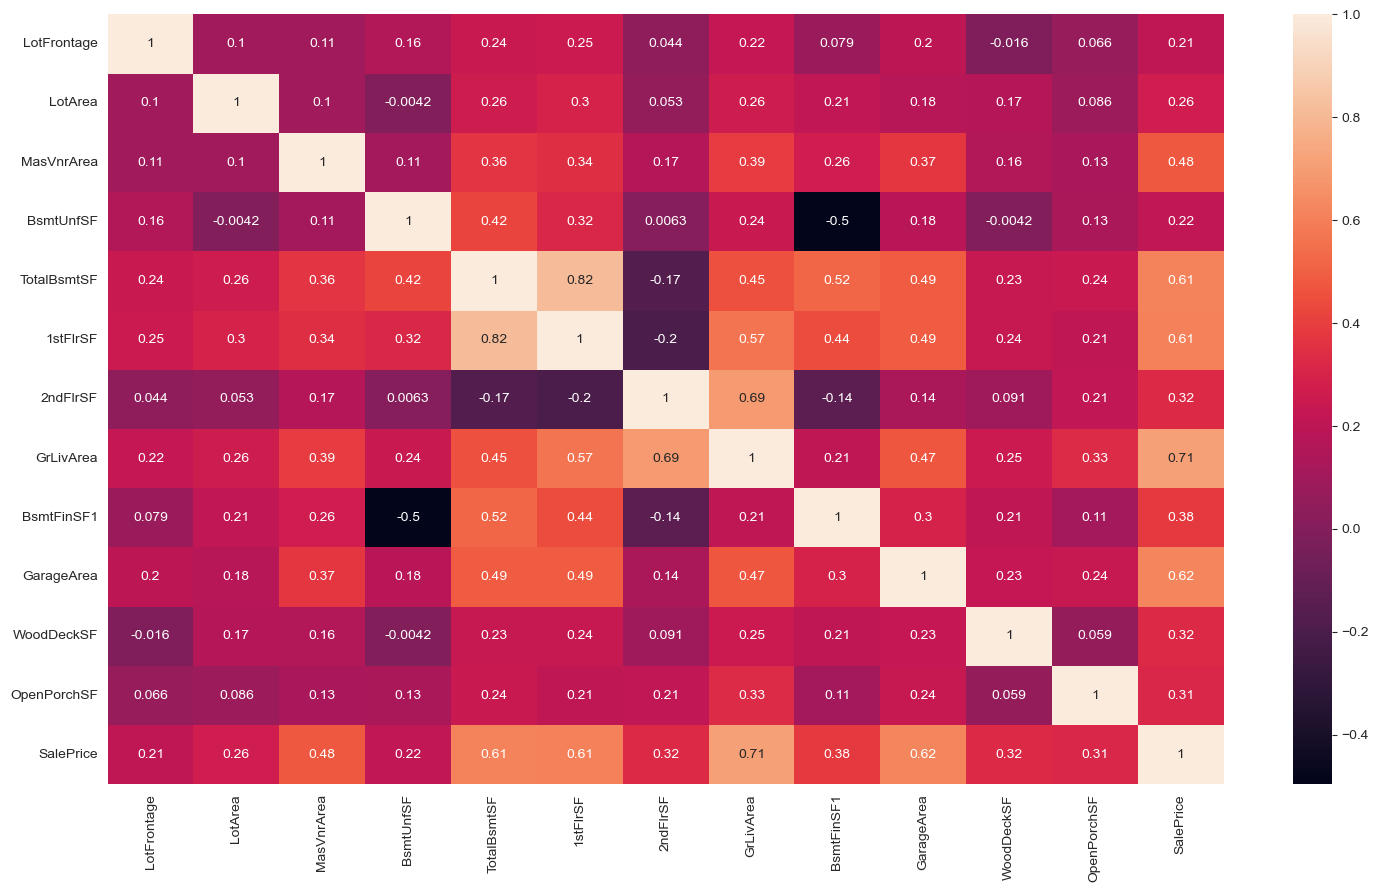

In [1351]:
# Correlation on a heatmap
cor = house_detail[numerical_cols].corr()
plt.figure(figsize=(18, 10))
sns.heatmap(cor, annot=True)
plt.show()

There seems to be a high co-relation between
- 1stFlrSF to TotalBasemtSF (0.82)
- GrLivArea to 2ndFlrSF     (0.69)

Since these independent variables are highly co-linear we will disregard TotalBasemtSF and  2ndFlrSF

In [1352]:
drop_num_cols = ['TotalBsmtSF', '2ndFlrSF']
house_detail.drop(drop_num_cols, inplace=True, axis=1)
[numerical_cols.remove(x) for x in drop_num_cols]
house_detail[numerical_cols].describe([0.1,0.25,0.5,0.8,0.9,0.95])

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFinSF1,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000
mean,57.6244,10507.8084,103.7567,567.1971,1161.5513,1514.1744,442.2750,472.5252,94.4128,46.4225,180624.1020
std,34.6558,9992.9871,181.1082,442.2092,385.0025,525.7995,455.3693,214.1718,125.4369,66.0602,79312.1283
min,0.0000,1300.0000,0.0000,0.0000,334.0000,334.0000,0.0000,0.0000,0.0000,0.0000,34900.0000
10%,0.0000,5000.0000,0.0000,74.0000,757.0000,912.0000,0.0000,240.0000,0.0000,0.0000,106250.0000
25%,42.0000,7537.5000,0.0000,222.0000,882.0000,1128.0000,0.0000,327.5000,0.0000,0.0000,129900.0000
50%,63.0000,9477.0000,0.0000,479.0000,1086.0000,1464.0000,381.0000,478.0000,0.0000,24.0000,162500.0000
80%,80.0000,12205.0000,206.0000,896.0000,1482.0000,1868.0000,795.0000,621.0000,192.0000,82.0000,230000.0000
90%,92.0000,14375.0000,335.0000,1232.0000,1680.0000,2158.0000,1064.0000,757.0000,262.0000,130.0000,278000.0000
95%,104.0000,17308.5000,456.0000,1468.0000,1827.0000,2464.0000,1272.0000,849.0000,335.0000,173.0000,325812.0000


### Categorical Variable conversion

In [1353]:
house_detail['MSZoning'] = house_detail.MSZoning.apply(lambda x: 'C' if x == 'C (all)' else x)

def overAllQuality(x):
    if x < 5:
        return "Low"
    elif x <= 7:
        return "Good"
    else:
        return "Very Good"

house_detail['OverallQual'] = house_detail.OverallQual.apply(lambda x: overAllQuality(x))
house_detail['OverallCond'] = house_detail.OverallCond.apply(lambda x: overAllQuality(x))
house_detail[categorical_cols].head()


,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,...,HeatingQC,KitchenQual,FireplaceQu,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageType,GarageFinish
0,60,RL,Reg,Inside,CollgCr,2Story,Good,Good,Gable,VinylSd,...,Ex,Gd,NoFireplaceQu,2,3,8,0,2,Attchd,RFn
1,20,RL,Reg,FR2,Veenker,1Story,Good,Very Good,Gable,MetalSd,...,Ex,TA,TA,2,3,6,1,2,Attchd,RFn
2,60,RL,IR1,Inside,CollgCr,2Story,Good,Good,Gable,VinylSd,...,Ex,Gd,TA,2,3,6,1,2,Attchd,RFn
3,70,RL,IR1,Corner,Crawfor,2Story,Good,Good,Gable,Wd Sdng,...,Gd,Gd,Gd,1,3,7,1,3,Detchd,Unf
4,60,RL,IR1,FR2,NoRidge,2Story,Very Good,Good,Gable,VinylSd,...,Ex,Gd,TA,2,4,9,1,3,Attchd,RFn


> As the errors on the response variable to be very large we will perform data transformation on the response variable to reduce the errors


In [1354]:
#y = house_detail['SalePrice']
y = np.log(house_detail['SalePrice'])
numerical_cols.remove('SalePrice')
X = house_detail[numerical_cols + categorical_cols + categorical_ordinal_cols]


In [1355]:
dummy_col = pd.get_dummies(X[categorical_cols], drop_first=True)
X.drop(categorical_cols, axis=1,inplace=True)
X = pd.concat([X, dummy_col], axis=1)

#drop_top_5 = [ 'GrLivArea', 'OverallQual_Very Good', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'MSZoning_FV']
#X.drop(drop_top_5, axis=1, inplace=True)
#numerical_cols.remove('GrLivArea')

X.head()

D:\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\jubin\AppData\Local\Temp\ipykernel_1972\2456887162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(categorical_cols, axis=1,inplace=True)


,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFinSF1,GarageArea,WoodDeckSF,OpenPorchSF,...,GarageCars_4,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,65,8450,196,150,856,1710,706,548,0,61,...,0,1,0,0,0,0,0,0,1,0
1,80,9600,0,284,1262,1262,978,460,298,0,...,0,1,0,0,0,0,0,0,1,0
2,68,11250,162,434,920,1786,486,608,0,42,...,0,1,0,0,0,0,0,0,1,0
3,60,9550,0,540,961,1717,216,642,0,35,...,0,0,0,0,0,1,0,0,0,1
4,84,14260,350,490,1145,2198,655,836,192,84,...,0,1,0,0,0,0,0,0,1,0


In [1356]:
print(len(X.columns))
categorical_cols

186


['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFullBath',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'FullBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageType',
 'GarageFinish']

## Model Building and Evaluation


In [1357]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size=0.3, random_state=100)


print(X_train.shape)
print(X_test.shape)

(1015, 186)
(436, 186)


In [1358]:
# Scaling numerical variables to fit the categorical variables
scaler = MinMaxScaler()
X_train[numerical_cols+ categorical_ordinal_cols] = scaler.fit_transform(X_train[numerical_cols + categorical_ordinal_cols])
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFinSF1,GarageArea,WoodDeckSF,OpenPorchSF,...,GarageCars_4,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
801,0.1278,0.0164,0.0000,0.4277,0.1782,0.1457,0.0349,0.3103,0.0000,0.0000,...,0,0,0,0,0,1,0,0,0,1
569,0.0000,0.0268,0.0000,0.0000,0.1187,0.0970,0.1671,0.4231,0.0490,0.0000,...,0,0,0,0,0,1,0,0,0,1
1181,0.2045,0.0200,0.1163,0.0514,0.2854,0.2333,0.2622,0.3399,0.1890,0.0969,...,0,1,0,0,0,0,0,0,0,0
808,0.2716,0.0566,0.6544,0.1627,0.1523,0.1245,0.0914,0.3413,0.0000,0.0000,...,0,1,0,0,0,0,0,0,1,0
1095,0.2492,0.0375,0.0000,0.5522,0.2059,0.1683,0.0043,0.3103,0.0000,0.0402,...,0,1,0,0,0,0,0,0,1,0


In [1359]:

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)


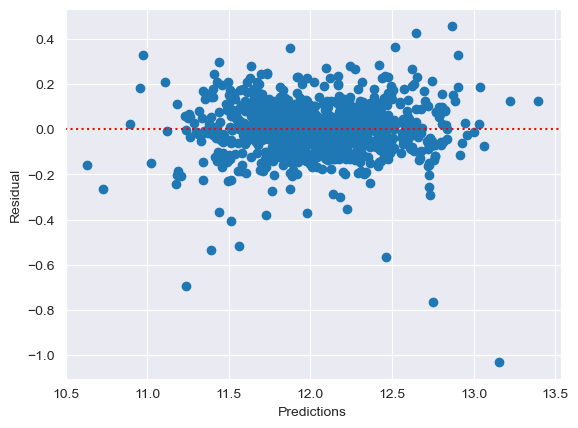

In [1360]:

y_res = y_train - y_pred_train
plt.scatter( y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


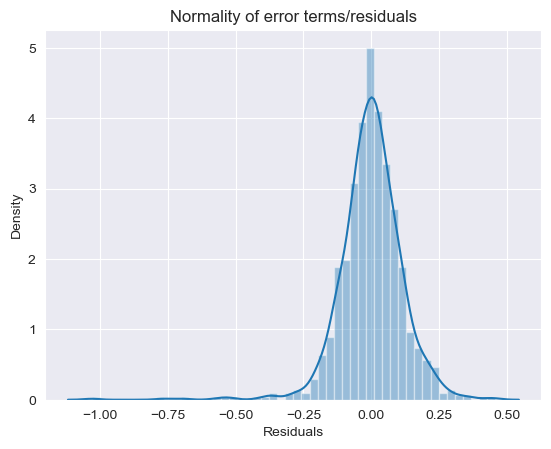

In [1361]:
# Distribution of errors
p = sns.distplot(y_res, kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()


r2 train score: 0.9148
r2 test score: -5.5191445408652584e+16
RSS train data: 13.8535
RSS train data: 3.792754966659785e+18
RMSE for train data: 0.116619037896906
RMSE for train data: 93268318.74398606


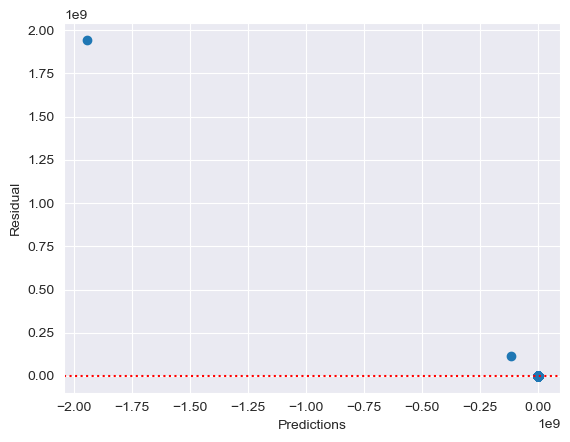

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


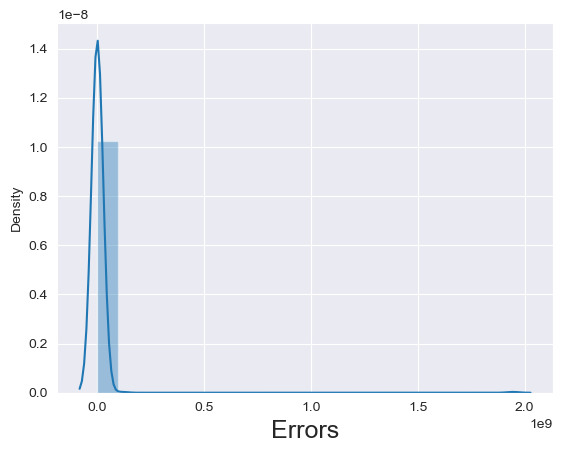

In [1362]:

X_test[numerical_cols + categorical_ordinal_cols] = scaler.transform(X_test[numerical_cols + categorical_ordinal_cols])
y_pred_test = lm.predict(X_test)

metric3 = [0]

r2_train_lr = round(r2_score(y_train, y_pred_train), 4)
print("r2 train score: {}".format(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = round(r2_score(y_test, y_pred_test), 4)
print("r2 test score: {}".format(r2_test_lr) )
metric3.append(r2_test_lr)

rss1_lr = round(np.sum(np.square(y_train - y_pred_train)), 4)
print("RSS train data: {}".format(rss1_lr))
metric3.append(rss1_lr)

rss1_test_lr = round(np.sum(np.square(y_test - y_pred_test)), 4)
print("RSS train data: {}".format(rss1_test_lr))
metric3.append(rss1_test_lr)

mse_train_lr = round(mean_squared_error(y_train, y_pred_train), 4)
print("RMSE for train data: {}".format(mse_train_lr ** 0.5))
metric3.append(mse_train_lr)

mse_test_train_lr = round(mean_squared_error(y_test, y_pred_test), 4)
print("RMSE for train data: {}".format(mse_test_train_lr ** 0.5))
metric3.append(mse_test_train_lr)

y_test_res = y_test - y_pred_test

plt.scatter( y_pred_test , y_test_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

fig = plt.figure()
sns.distplot(y_test_res, bins=20)
plt.xlabel('Errors', fontsize= 18)
plt.show()


The r-squared value on the test data seems to be very low and the error shows a pattern and isn't normally distributed
This shows that the model is overfit the training data and hence fails on the test data
We go ahead with Lasso regularization to improve the r-square value and also do feature selection

### Lasso Regularization



In [1363]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [1364]:
# Setting the alpha on the model
alpha = model_cv.best_params_['alpha']
print("Setting hyper-parameter to {}".format(alpha))
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)


Setting hyper-parameter to 0.001


Lasso(alpha=0.001)

In [1365]:
coef_list = list(zip(X.columns, lasso.coef_))
selected_features = [t for t in coef_list if (t[1] < 0 or t[1] > 0) ]
print("Selected features: {}".format(len(selected_features)))


Selected features: 79


In [1366]:
# Lets calculate some metrics such as R2 score, RSS and MSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric = [alpha]
r2_train_lr = round(r2_score(y_train, y_pred_train),4)
print("r2 for training data: {}".format(r2_train_lr))
metric.append(r2_train_lr)

r2_test_lr = round(r2_score(y_test, y_pred_test),4)
print("r2 for test data: {}".format(r2_test_lr))
metric.append(r2_test_lr)

rss1_lr = round(np.sum(np.square(y_train - y_pred_train)),4)
print("RSS for training data: {}".format(rss1_lr))
metric.append(rss1_lr)

rss2_lr = round(np.sum(np.square(y_test - y_pred_test)),4)
print("RSS for test data: {}".format(rss2_lr))
metric.append(rss2_lr)

mse_train_lr = round(mean_squared_error(y_train, y_pred_train),4)
print("RMSE Trained: {}".format(mse_train_lr ** 0.5, 2))
metric.append(mse_train_lr)

mse_test_lr = round(mean_squared_error(y_test, y_pred_test),4)
print("RMSE Test: {}".format(mse_test_lr ** 0.5))
metric.append(mse_test_lr)


r2 for training data: 0.8835
r2 for test data: 0.8708
RSS for training data: 18.9394
RSS for test data: 8.8781
RMSE Trained: 0.13674794331177342
RMSE Test: 0.14282856857085702


### Residual Analysis

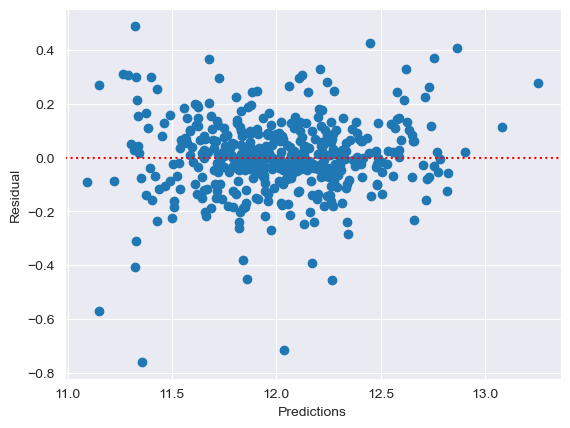

In [1367]:
y_test_res = y_test - y_pred_test

plt.scatter(y_pred_test, y_test_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


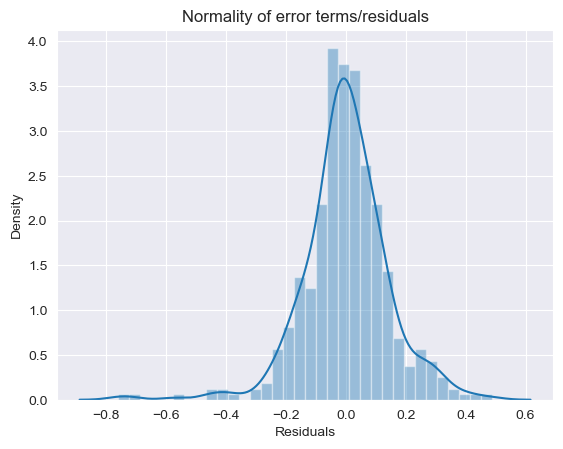

In [1368]:
# Distribution of errors
p = sns.distplot(y_test_res, kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

The residual analysis shows the errors are normally distributed and shows no pattern to errors vs. predictions


# Ridge Regression

In [1369]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1370]:
print(model_cv.best_params_)

{'alpha': 0.7}


In [1371]:
alpha = model_cv.best_params_['alpha']

print("Setting hyper-parameter to {}".format(alpha))
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)

y_pred_test = ridge.predict(X_test)

metric2 = [alpha]
r2_train_lr = round(r2_score(y_train, y_pred_train),4)
print("r2 for training data: {}".format(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = round(r2_score(y_test, y_pred_test),4)
print("r2 for test data: {}".format(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = round(np.sum(np.square(y_train - y_pred_train)),4)
print("RSS for training data: {}".format(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = round(np.sum(np.square(y_test - y_pred_test)),4)
print("RSS for test data: {}".format(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = round(mean_squared_error(y_train, y_pred_train), 4)
print("RMSE Trained: {}".format(mse_train_lr ** 0.5))
metric2.append(mse_train_lr)

mse_test_lr = round(mean_squared_error(y_test, y_pred_test),4)
print("RMSE Test: {}".format(mse_test_lr ** 0.5))
metric2.append(mse_test_lr)


Setting hyper-parameter to 0.7
r2 for training data: 0.9102
r2 for test data: 0.8784
RSS for training data: 14.6088
RSS for test data: 8.3553
RMSE Trained: 0.12
RMSE Test: 0.13856406460551018


### Residual Analysis


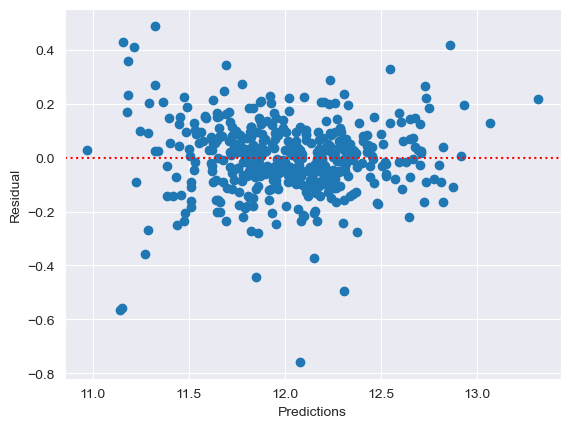

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


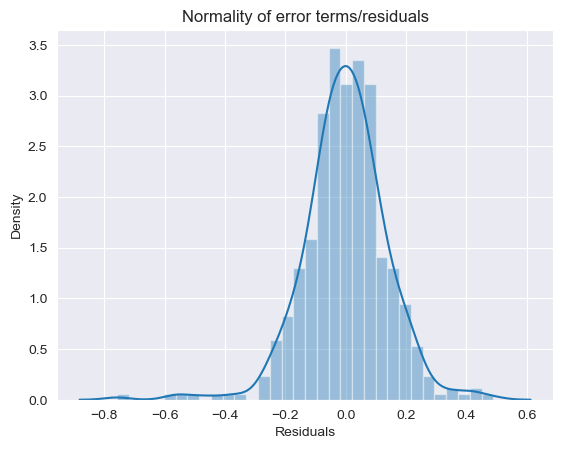

In [1372]:
y_test_res = y_test - y_pred_test

plt.scatter(y_pred_test, y_test_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

# Distribution of errors
p = sns.distplot(y_test_res, kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()


The residual analysis shows the errors are normally distributed and shows no pattern to errors vs. predictions

In [1373]:
# comparing the metrics
lr_table = {'Metric': ['Lambda',
                       'R2 Score (Train)', 'R2 Score (Test)',
                       'RSS (Train)', 'RSS (Test)',
                       'RMSE (Train)', 'RMSE (Test)'],
            }

lr_metric = pd.DataFrame(lr_table, columns=['Metric'])
lg_metric = pd.Series(metric3, name='Linear Regression')
rg_metric = pd.Series(metric2, name='Ridge Regression')
ls_metric = pd.Series(metric, name='Lasso Regression')

final_metric = pd.concat([lr_metric,lg_metric, rg_metric, ls_metric], axis=1)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
final_metric
## Lets observe the changes in the coefficients after regularization

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,Lambda,0.0000,0.7000,0.0010
1,R2 Score (Train),0.9148,0.9102,0.8835
2,R2 Score (Test),-55191445408652584.0000,0.8784,0.8708
3,RSS (Train),13.8535,14.6088,18.9394
4,RSS (Test),3792754966659785216.0000,8.3553,8.8781
5,RMSE (Train),0.0136,0.0144,0.0187
6,RMSE (Test),8698979281329781.0000,0.0192,0.0204


In [1374]:
# comparing the coefficients
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head()


C:\Users\jubin\AppData\Local\Temp\ipykernel_1972\217130079.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X.columns


,Linear,Ridge,Lasso
LotFrontage,-0.0697,-0.0605,-0.0000
LotArea,0.3571,0.2246,0.0000
MasVnrArea,-0.0368,-0.0040,0.0000
BsmtUnfSF,0.0050,0.0201,0.0167
1stFlrSF,-0.4028,0.1596,0.0000
